# Example using scipy stats probplot for Quantile-Quantile plots (Q-Q plots)

In [104]:
# Setup
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(0)

mu = 0  # mean
sigma = 1  # standard deviation

points = np.random.normal(mu, sigma, 1000)

print("First 10 points (of 1000):", points[:10])
print(pd.Series(points).describe())

('First 10 points (of 1000):', array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ]))
count    1000.000000
mean       -0.045257
std         0.987527
min        -3.046143
25%        -0.698420
50%        -0.058028
75%         0.606951
max         2.759355
dtype: float64


## Plot histogram and QQ plots together

('slope, intercept, r:', 0.9892713568120575, -0.045256707490195364, 0.9994824641317024)
r is the square root of the coefficient of determination


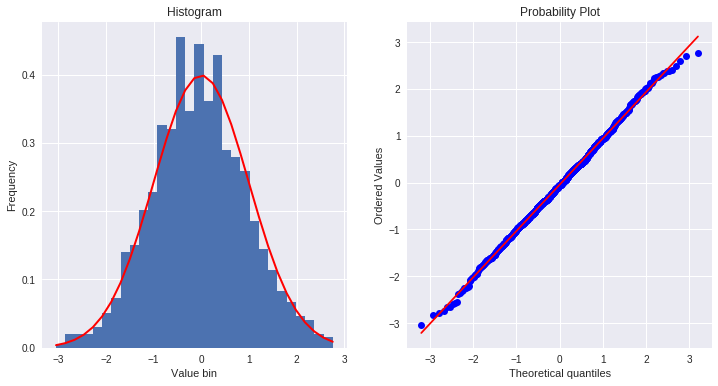

In [105]:
def plot_histogram_and_qq(points, mu, sigma, distribution_type="norm"):
  # Plot histogram of the 1000 points
  plt.figure(figsize=(12,6))
  ax = plt.subplot(1,2,1)
  count, bins, ignored = plt.hist(points, 30, normed=True)
  ax.set_title('Histogram')
  ax.set_xlabel('Value bin')
  ax.set_ylabel('Frequency')

  # Overlay the bell curve (normal distribution) on the bins data
  bell_curve = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))
  plt.plot(bins, bell_curve, linewidth=2, color='r')

  # Q-Q plot
  plt.subplot(1,2,2)
  res = stats.probplot(points, dist=distribution_type, plot=plt)
  (osm, osr) = res[0]
  (slope, intercept, r) = res[1]
  # For details see: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html
  print("slope, intercept, r:", slope, intercept, r)
  print("r is the square root of the coefficient of determination")

  plt.show()
  
# Run on the initial normally distributed data
plot_histogram_and_qq(points, mu, sigma)

## Run it again on a uniform distribution

('First 10 points (of 1000):', array([ 2.57523127,  1.60422898,  3.06462078,  3.73260086,  2.19798091,
        3.95386467,  0.91815909, -3.70296317, -3.88598788, -1.263169  ]))
count    1000.000000
mean        0.102926
std         2.337933
min        -3.999410
25%        -1.851285
50%         0.225588
75%         2.152776
max         3.988213
dtype: float64
('slope, intercept, r:', 2.2887559084421065, 0.10292591860780509, 0.9767335657066317)
r is the square root of the coefficient of determination


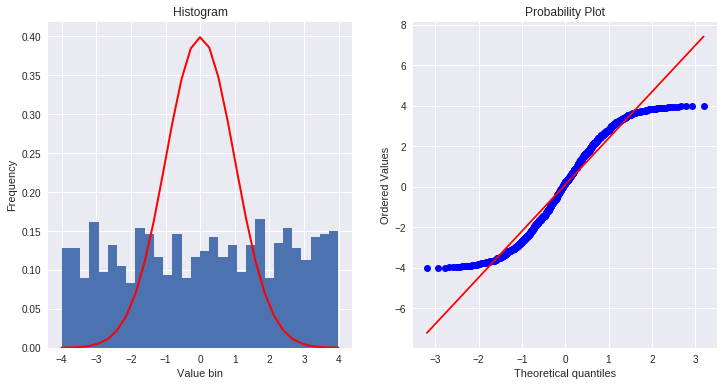

In [106]:
points = np.random.uniform(low=-4, high=4, size=1000)

print("First 10 points (of 1000):", points[:10])
print(pd.Series(points).describe())

# Run on the initial setup
plot_histogram_and_qq(points, mu, sigma)